In [1]:
# 导入所需要的包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jieba

import jieba
import matplotlib.pyplot as plt
import pandas as pd
from imageio import imread  # pip install pillow
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [2]:
# 读取数据
train = pd.read_excel('./data/data.xlsx')
test = pd.read_excel('./data/test.xlsx')
data_数据说明 = pd.read_excel('./data/字段说明.xlsx')

In [3]:
train

target  userId  sellerId                  timestamp  \
0           1     127      1708 2019-10-01 00:57:45.000003   
1           1    1661       886 2019-10-01 00:42:07.000001   
2           0   92758     10612 2019-10-01 00:51:18.000000   
3           0    1639      1699 2019-10-03 00:01:56.000001   
4           1  241839     36556 2019-10-01 00:07:56.000004   
...       ...     ...       ...                        ...   
17948       0   34025     24833 2020-09-25 23:15:36.000003   
17949       1     656       901 2020-09-25 23:17:48.999999   
17950       1     612       743 2020-09-27 23:36:59.000000   
17951       1  146739     15687 2020-09-27 23:53:15.000000   
17952       1     444      1143 2020-09-27 23:59:19.999997   

                                                 comment  
0                          text：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆   
1             text：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× ×   
2      text：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好...  
3                                   text：谢谢快递哥哥，非常准时，辛苦啦  
4      非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹...  
...                                                  ...  
17948  text：感觉这里好像发挥不是很稳定,来了几此,有好有坏.吃日料主要就关注三文鱼,这里的属于...  
17949               text：订的九点送到，十二点才到，呵呵× × × × × × × ×   
17950  text：差评！辣白菜五花肉石锅拌饭超级难吃！五花肉又硬又难吃，感觉不新鲜。以后再也不会吃这家店了  
17951  又贵又不好吃，老婆几次非要来看看，这次一吃真难吃。\n蒸没错，但比炒菜更油腻，没啥菜好吃，以...  
17952   text：小炒肉太辣，辣椒放太多，凉粉更辣！还有就是连筷子都不给难道要用手抓着吃吗？× × ×   

[17953 rows x 5 columns]

In [4]:
text = ''
for i in train['comment'].tolist():
    text+=i.replace('text','')
text

'：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆ ：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× × ：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好的。推荐推荐，还能顺便逛逛田林路\n：谢谢快递哥哥，非常准时，辛苦啦非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹！！！！！！\n：这里绝对是我这种超爱美食滴小孩 大大大额天堂来了`~\n芋贵人和宝珠奶酪\n是每次必去的了！ 不知道还有没有分店的`\n：送了两个多小时,连个解释都没有,还是我真的打电话过去问的,醉了× × × ：吃起来不方便...,而且似乎有股异味..,闻起来。：花蛤里全是沙子☆ ☆ ☆ ：＆＆＆＆＆汤包还是挺好吃的,再次订了：味道不错，很实惠定位困难，过来一看都是吃盒饭的。菜量少的可怜,服务员就2个，烤肉一点也不好，老的不得了，以后绝对不会再光顾\n：包子都不想说啥了：买了好几次了都没问题，但这次的咖啡不知为什么上面一层油，幸亏打开盖看了一下，要不就喝进去了：不得不说今天餐厅做菜的速度非常非常的慢：送的可乐没给× × × ：薯条皮了，奶酪棒没味道：耗费时间久，卖家态度不认真，食物不齐全，：妈妈很喜欢他家的泡菜,当宝贝一样坑爹啊，钱没了，蛋糕也没吃到。在也不想去这家吃了，伤不起啊…………………………………………………………………\n：什么叫完美~,订了口口香~优谷你就知道，不是打广告,真的非常棒，味道，菜色，必须赞，足足足！,百度骑士非常给力。服务是想当热情，在楼下非常正式的军姿等待我真的们取餐，双手端饭送给我真的们，还祝我真的们用餐愉快，一双墨镜透着帅气~：交通挺方便的,10号线紫藤路站出来就是,服务很好,里面的鱼都学精了,不太容易钓得到,船头机会大一些.三文鱼很好吃.\n：很不错，速度也很快。＆＆：！！很不错，新鲜水果轧的果汁！）我们点的杨桃的，味道很新鲜，老板人也很好……很值得推荐的一家店！！！\n：辛苦了，味道不错，比想象的还要好呢！速度巨快！：虽然是用锅烤的，但羊肉很嫩，好吃！还有东北大拉皮也不错，吃完还送了五十元优惠卷，现在中信银行卡还打8.8折！\n：老实说经常路过，看到里面人还不少，但是就是没进去过。挺好找的地方，下了和义西里站就到。哪天一定得和老婆一起去吃吃！\n：就去吃了螺蛳粉

In [5]:
words = jieba.lcut(text)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dupeibo\AppData\Local\Temp\jieba.cache
Loading model cost 0.861 seconds.
Prefix dict has been built successfully.


In [6]:
# 停用词 简单理解：无视这些烂大街的东西
# 停用词是指在信息检索中，为节省存储空间和提高搜索效率，
# 在处理自然语言数据（或文本）之前或之后会自动过滤掉某些字或词
stop = pd.read_csv('E:\\Learn File\\大一\\大一爬虫\\spider\\week8\\word_cloud\\stoplist.txt', header=None, encoding='utf-8',engine='python', sep='limh')
b = stop.drop_duplicates()
stop = [' ', '　'] + list(stop[0])
# stop1 = [chr(32), chr(12288)] + list(stop[0])
stop = set(stop)
# stop

In [7]:
# 去停用词
words = [word for word in words if word not in stop]
word_num = pd.DataFrame(words, columns=['word'])
word_num = word_num[word_num['word'] != '\n']
word_num['count'] = 1
word_num = word_num.groupby('word').sum()
word_many = word_num[word_num['count'] > 50]

In [8]:
words

['订餐',
 '半小时',
 '不见',
 '餐',
 '催',
 '挂',
 '电话',
 '☆',
 '☆',
 '☆',
 '太',
 '不靠',
 '谱',
 '漏发',
 '订单',
 '菜',
 '送错',
 '早',
 '送',
 '小时',
 '超级',
 '超级',
 '喜欢',
 '吃',
 '每次',
 '好开心',
 '口味',
 '建议',
 '手套',
 '戴',
 '几双',
 '吃',
 '形象',
 '不太好',
 '推荐',
 '推荐',
 '顺便',
 '逛逛',
 '田林',
 '路',
 '\n',
 '谢谢',
 '快递',
 '哥哥',
 '准时',
 '辛苦',
 '差得',
 '餐厅',
 '上菜',
 '慢',
 '贵',
 '餐厅',
 '饿死',
 '那种',
 '\n',
 '面条',
 '味道',
 '一碗',
 '28',
 '坑',
 '死',
 '爹',
 '\n',
 '超爱',
 '美食',
 '滴',
 '小孩',
 '大额',
 '天堂',
 '\n',
 '芋',
 '贵人',
 '宝珠',
 '奶酪',
 '\n',
 '每次',
 '必去',
 '分店',
 '\n',
 '送',
 '两个',
 '小时',
 '解释',
 '真的',
 '打电话',
 '问',
 '醉',
 '吃',
 '有股',
 '异味',
 '闻',
 '花蛤里',
 '全是',
 '沙子',
 '☆',
 '☆',
 '☆',
 '汤包',
 '挺好吃',
 '订',
 '味道',
 '不错',
 '实惠',
 '定位',
 '困难',
 '一看',
 '吃',
 '盒饭',
 '菜量',
 '少',
 '可怜',
 '服务员',
 '烤肉',
 '一点',
 '不好',
 '光顾',
 '\n',
 '包子',
 '不想',
 '几次',
 '咖啡',
 '不知',
 '一层',
 '油',
 '幸亏',
 '打开',
 '盖',
 '喝进去',
 '餐厅',
 '做菜',
 '速度',
 '慢',
 '送',
 '可乐',
 '薯条',
 '皮',
 '奶酪',
 '棒',
 '味道',
 '耗费',
 '时间',
 '久',
 '卖家',
 '态度',
 '食物',
 '齐全',
 '妈妈',
 '喜

In [9]:
word_num.sort_values(by='count',ascending=False).iloc[:,:10]

count
word          
吃         5215
不错        3855
味道        3637
好吃        3107
真的        2626
...        ...
得饶人处且饶人      1
從來           1
御品           1
復            1
�            1

[22125 rows x 1 columns]

In [10]:
word_many

count
word       
10      192
100      61
11      159
12      177
13       51
...     ...
鸡肉      154
鸡蛋       94
鸭        84
麻辣       70
麻辣烫      57

[573 rows x 1 columns]

(-0.5, 735.5, 731.5, -0.5)

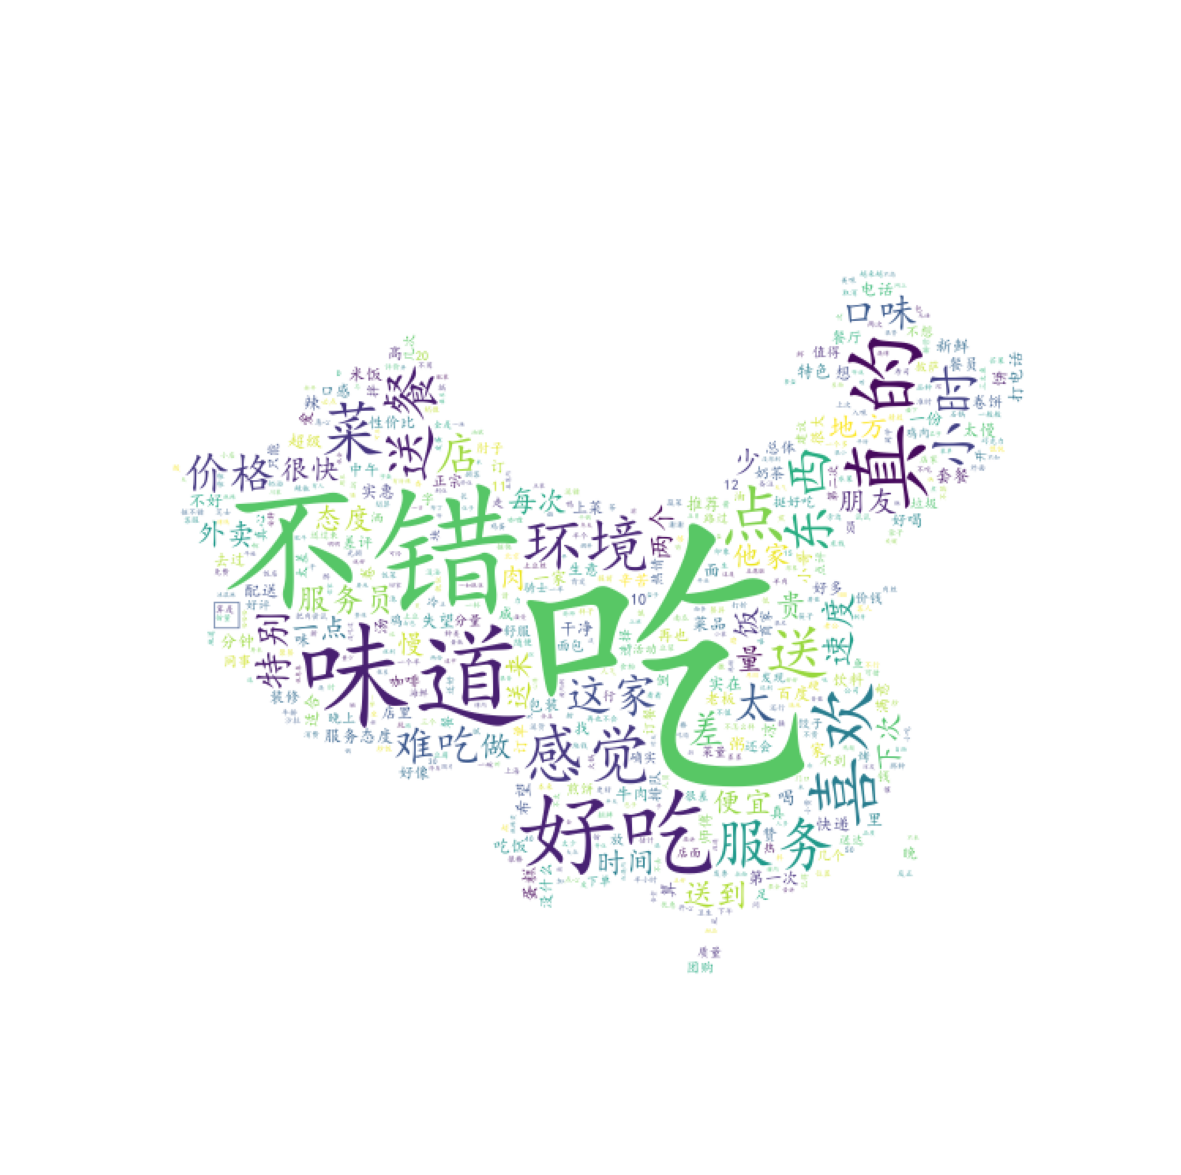

In [11]:

# 背景图片
back_pic = imread("E:\\222.png")  # aixin.jpg # 设置背景图片
wc = WordCloud(font_path='C:\\Windows\\Fonts\\simkai.TTF',  # 设置字体 使用的 windows 自带的字体
               background_color="white",  # ="white", #背景颜色
               max_words=2000,  # 词云显示的最大数
               mask=back_pic,  # 设置背景图片
               max_font_size=200,  # =200, #字体最大值
               random_state=42, )

# 生成词云
wc.fit_words(word_many['count'])

# 绘图
plt.figure(figsize=(30, 15))
plt.imshow(wc)
plt.axis('off')

### 查看积极评价和消极评价

In [23]:
## 定义词频函数
def count_word(train):
    text = ''
    for i in train['comment'].tolist():
        text+=i.replace('text','')
    # 分词、去停用词
    words = jieba.lcut(text)
    stop = pd.read_csv('E:\\Learn File\\大一\\大一爬虫\\spider\\week8\\word_cloud\\stoplist.txt', header=None, encoding='utf-8',engine='python', sep='limh')
#     stop = pd.read_csv('E:\\Learn File\\大三\\数据科学竞赛\\week03\\stopwords-master\\scu_stopwords.txt', header=None, encoding='utf-8',engine='python', sep='limh')
    b = stop.drop_duplicates()
    stop = [' ', '　','不错','好吃','难吃','喜欢','差','吃','东西','太','菜','点','送','饭','慢','店','真的'] + list(stop[0])
    stop = set(stop)
    # 去停用词
    words = [word for word in words if word not in stop]
    word_num = pd.DataFrame(words, columns=['word'])
    word_num = word_num[word_num['word'] != '\n']
    word_num['count'] = 1
    word_num = word_num.groupby('word').sum()
    word_many = word_num[word_num['count'] > 50]
    return word_num.sort_values(by='count',ascending=False)

#### 积极评价

In [24]:
positive = count_word(train[train['target']==0])
positive.iloc[:10]

count
word       
味道     2373
环境      932
感觉      812
价格      676
服务      676
这家      598
特别      511
口味      491
送餐      460
朋友      450

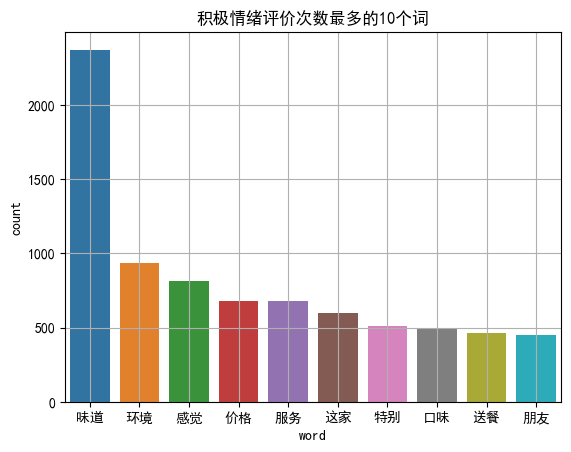

In [25]:
plt.title('积极情绪评价次数最多的10个词')
sns.barplot(x=positive.iloc[:10].index, y="count", data=positive.iloc[:10])
plt.grid()

#### 消极评价

In [26]:
nag = count_word(train[train['target']==1])
nag.iloc[:10]

count
word       
味道     1264
小时      960
送餐      767
送到      624
服务      556
感觉      518
服务员     461
送来      411
外卖      410
太慢      398

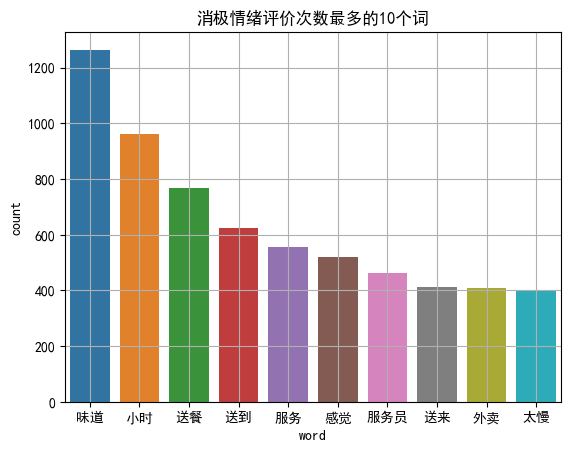

In [29]:
plt.title('消极情绪评价次数最多的10个词')
sns.barplot(x=nag.iloc[:10].index, y="count", data=nag.iloc[:10])
plt.grid()

<AxesSubplot:xlabel='word'>

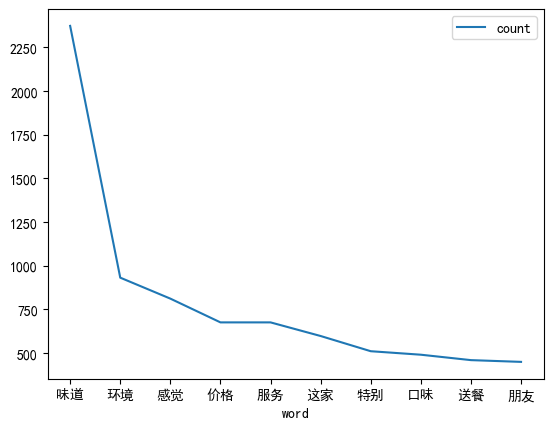

In [28]:
sns.lineplot(data=positive.iloc[:10])